# 1. Problem Statement

**Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan. Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers.**

# 2. Loading Packages and Data.

In [1]:
import pandas as pd

import seaborn as sns

import numpy as np

import matplotlib.pyplot as plt 

%matplotlib inline 

import warnings  
warnings.filterwarnings("ignore")

In [2]:
# Reading data

train= pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
train_original=train.copy()
test_original=test.copy()

# 3. Understanding the Data

In [3]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [4]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [5]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
train.shape  ,  test.shape


((614, 13), (367, 12))

# 4. Univariate Analysis

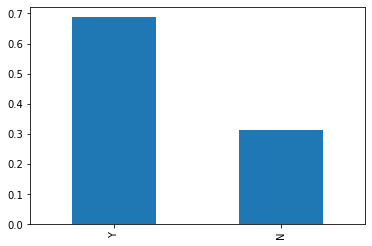

In [7]:
#Loan_Status (Target_Variable)

train["Loan_Status"].value_counts(normalize="true").plot.bar()
plt.show()

**INFERENCE : The loan of 422(around 69%) people out of 614 was approved.**

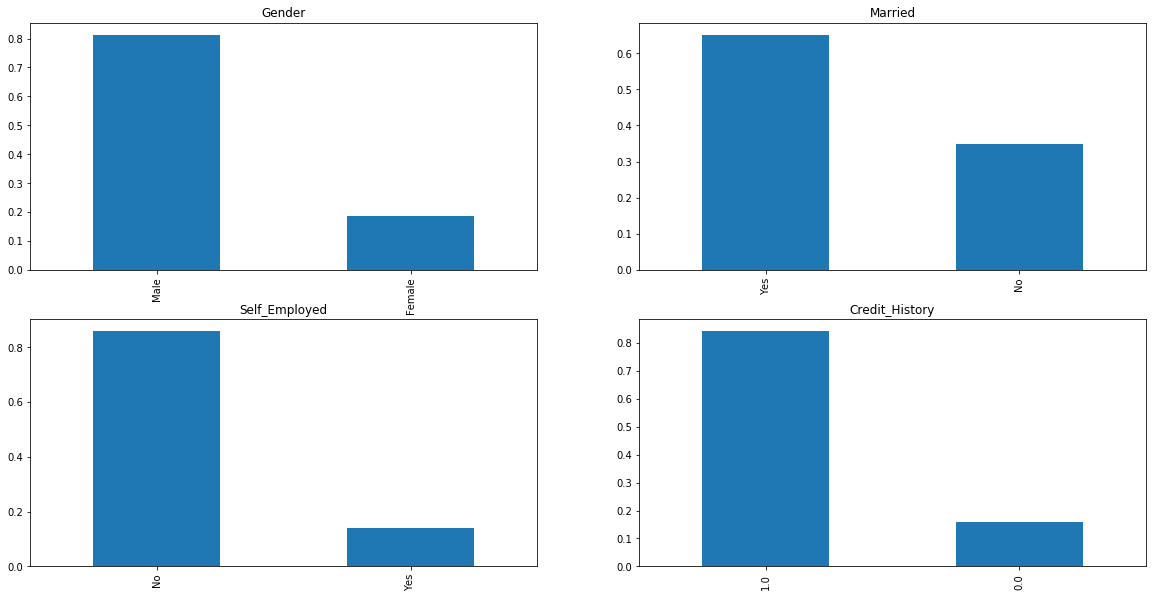

In [8]:
#Independent Variable (Categorical) 

plt.figure(1) 

plt.subplot(221) 
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender') 

plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(title= 'Married') 

plt.subplot(223) 
train['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed') 

plt.subplot(224) 
train['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History') 

plt.show()

**INFERENCE:**

**80% applicants in the dataset are male.
Around 65% of the applicants in the dataset are married.
Around 15% applicants in the dataset are self employed.
Around 85% applicants have repaid their debts.**

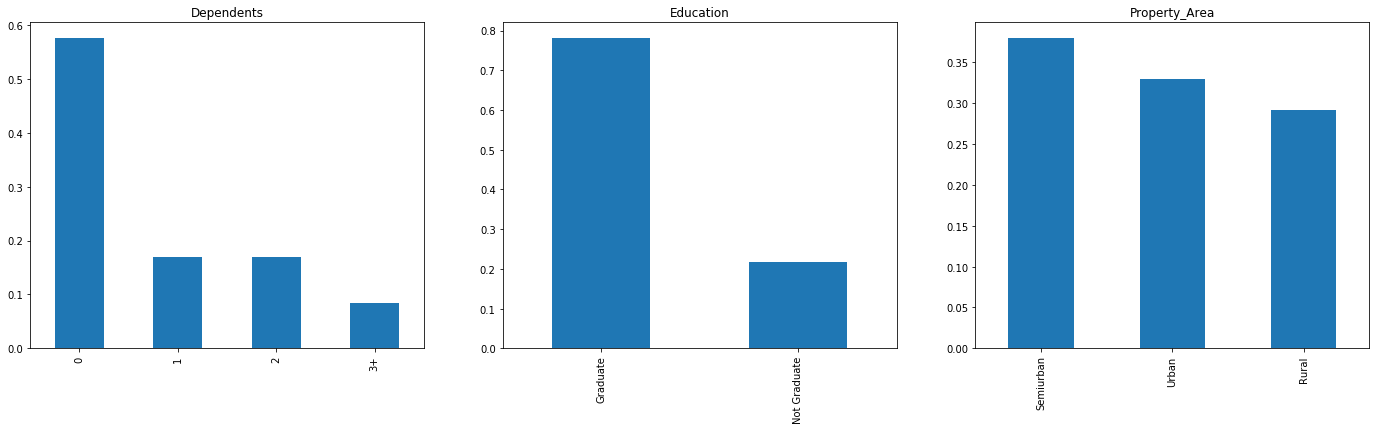

In [9]:
#Independent Variable (Ordinal)

plt.figure(1) 

plt.subplot(131) 
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6), title= 'Dependents') 

plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(title= 'Education') 

plt.subplot(133) 
train['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area') 

plt.show()

**INFERENCE:**

**Most of the applicants don’t have any dependents.
Around 80% of the applicants are Graduate.
Most of the applicants are from Semiurban area**

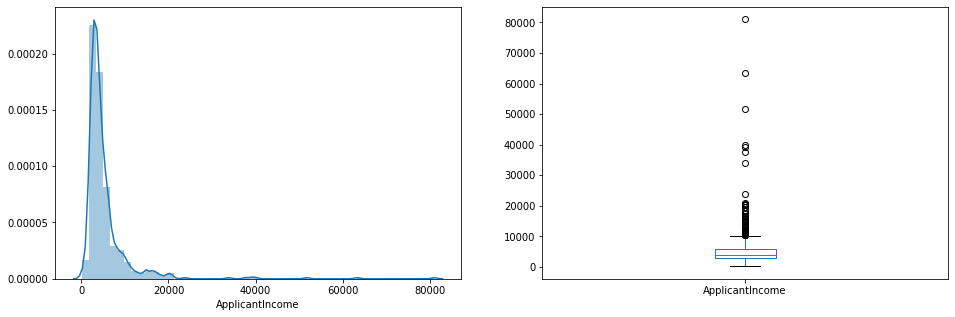

In [10]:
#Numerical_Variable (ApplicantIncome)

plt.figure(1)

plt.subplot(121) 
sns.distplot(train['ApplicantIncome']); 

plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(16,5))

plt.show()

**INFERENCE :**

**It can be inferred that most of the data in the distribution of applicant income is towards left which means it is not normally distributed. We will try to make it normal later as algorithms works better if the data is normally distributed.**

**The boxplot confirms the presence of a lot of outliers/extreme values. This can be attributed to the income disparity in the society.**



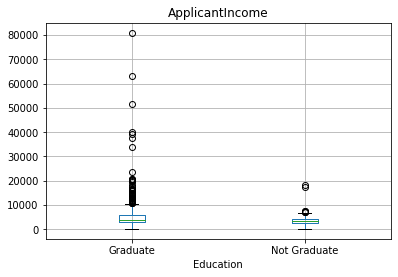

In [11]:
#ApplicantIncome_by_Education

train.boxplot(column='ApplicantIncome', by = 'Education'),
p=plt.suptitle("")

**INFERENCE : There are a higher number of graduates with very high incomes, which are appearing to be the outliers.**


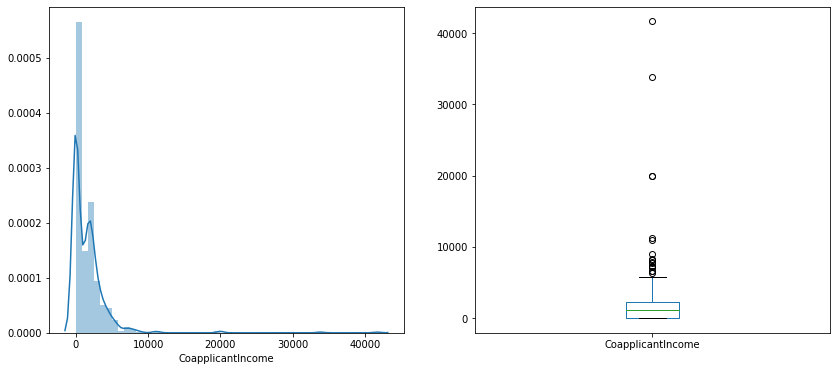

In [12]:
#Numerical_Variable (CoapplicantIncome)

plt.figure(1)

plt.subplot(121)
sns.distplot(train["CoapplicantIncome"])

plt.subplot(122)
train["CoapplicantIncome"].plot.box(figsize=(14,6))

plt.show()

In [13]:
train['CoapplicantIncome'].quantile([0,0.25,0.50,0.75,1])

0.00        0.00
0.25        0.00
0.50     1188.50
0.75     2297.25
1.00    41667.00
Name: CoapplicantIncome, dtype: float64

**INFERENCE :**

**We see a similar distribution as that of the applicant income. Majority of coapplicant’s income ranges from 0 to 5000. We also see a lot of outliers in the coapplicant income and it is not normally distributed.**

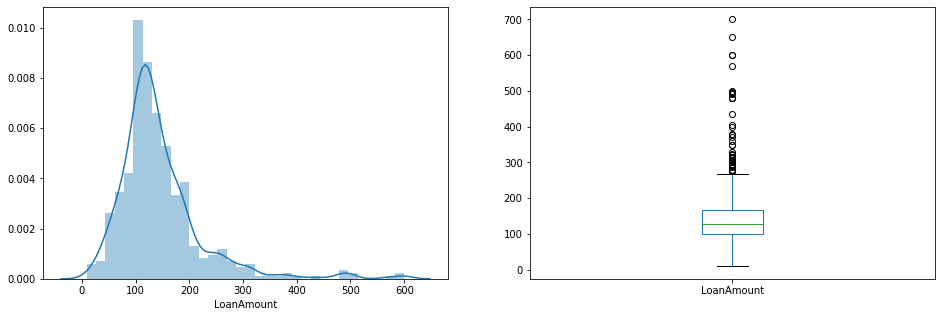

In [14]:
#Numerical_Variable (LoanAmount)

plt.figure(1)

plt.subplot(121)
df=train.dropna()
sns.distplot(df['LoanAmount']); 

plt.subplot(122) 
train['LoanAmount'].plot.box(figsize=(16,5)) 

plt.show()

**INFERENCE :We see a lot of outliers in this variable and the distribution is fairly normal.**

# 5. Bivariate Analysis

**Categorical : Independent Variable vs Target Variable**

In [15]:
# Gender vs Loan_status

Gender = pd.crosstab(train['Gender'], train['Loan_Status']).apply(lambda x : x/x.sum(),axis=1 )
Gender

Loan_Status,N,Y
Gender,,
Female,0.330357,0.669643
Male,0.306748,0.693252


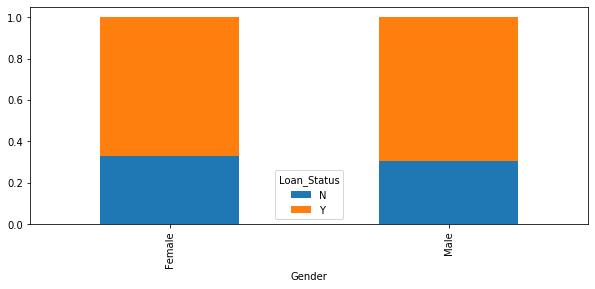

In [16]:
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar", stacked=True, figsize=(10,4))
plt.show()

**INFERENCE : It can be inferred that the proportion of male and female applicants is more or less same for both approved and unapproved loans.**

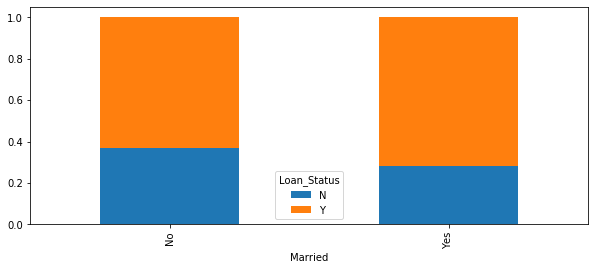

In [17]:
# Married vs Loan_Status

Married = pd.crosstab(train['Married'],train['Loan_Status'])
Married.div(Married.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(10,4))
plt.show()

**INFERENCE : Proportion of married applicants is higher for the approved loans.**

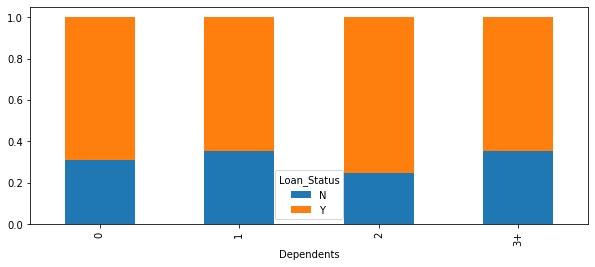

In [18]:
# Dependents vs Loan_Status

Dependents = pd.crosstab(train['Dependents'],train['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(10,4))
plt.show()

**INFERENCE : Distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status.**

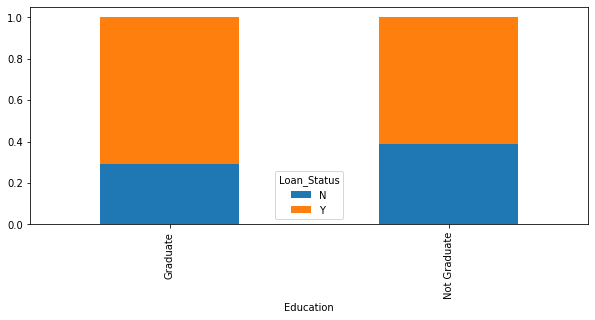

In [19]:
# Education vs Loan_Status

Education = pd.crosstab(train['Education'],train['Loan_Status'])
Education.div(Education.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(10,4))
plt.show()

**INFERENCE : Proportion of graduate applicants is higher for the approved loans.**

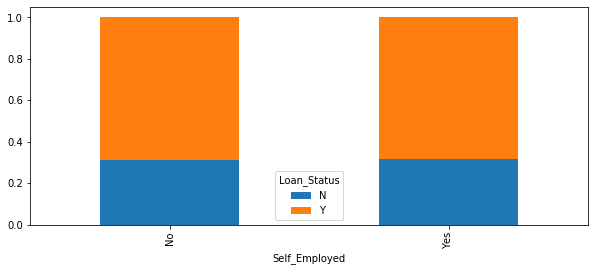

In [20]:
# Self_Employed vs Loan_Status

Self_Employed = pd.crosstab(train['Self_Employed'],train['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(10,4))
plt.show()

**INFERENCE : There is nothing significant we can infer from Self_Employed vs Loan_Status plot.**

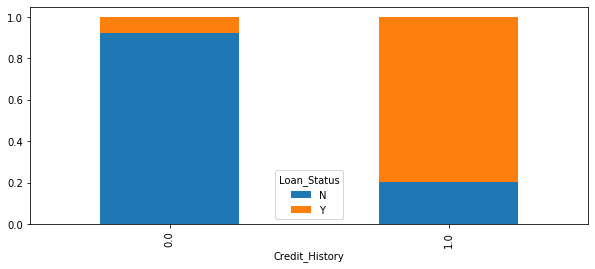

In [21]:
# Credit_History vs Loan_Status

Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status']) 
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(10,4))
plt.show() 

**INFERENCE : It seems people with credit history as 1 are more likely to get their loans approved.**

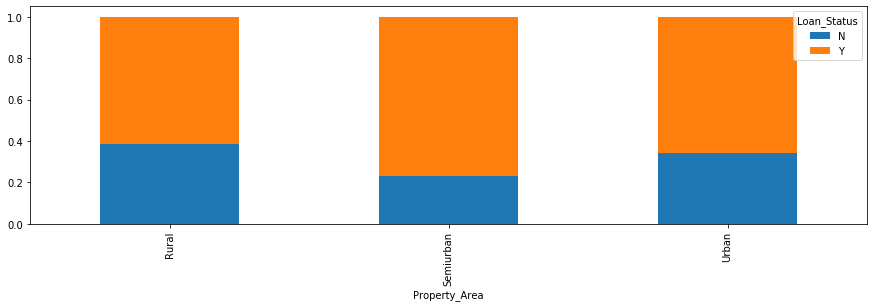

In [22]:
#Property_Area vs Loan_Status

Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status']) 
Property_Area.div(Property_Area.sum(1).astype(float),axis=0).plot(kind="bar", stacked=True, figsize=(15,4))
plt.show()

**INFERENCE:Proportion of loans getting approved in semiurban area is higher as compared to that in rural or urban areas.**



**Numerical : Independent Variable vs Target Variable**

In [23]:
# ApplicantIncome vs Loan_Status

train.groupby('Loan_Status')['ApplicantIncome'].mean()


Loan_Status
N    5446.078125
Y    5384.068720
Name: ApplicantIncome, dtype: float64

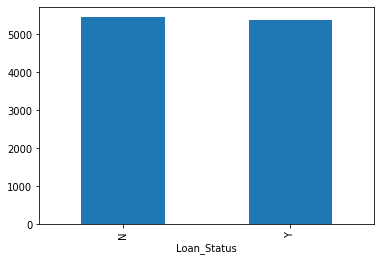

In [24]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()
plt.show()

**INFERENCE :** 

**Here the y-axis represents the mean applicant income. We don’t see any significant 
difference in the mean income. So, let’s make bins for the applicant income variable based on the values in it and analyze the corresponding loan status for each bin.**

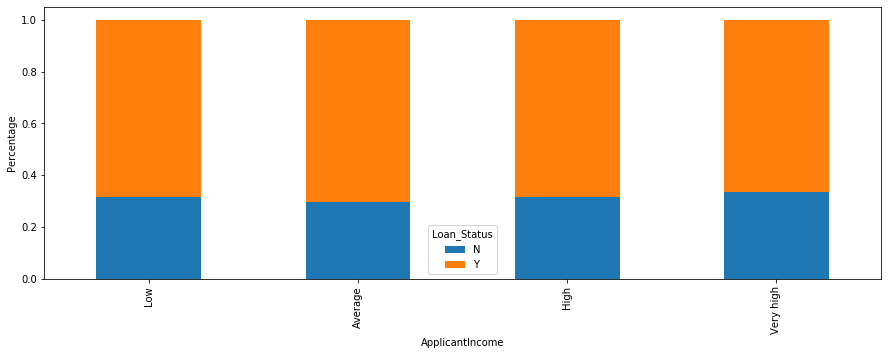

In [25]:
bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High', 'Very high'] 
train['Income_bin']=pd.cut(train['ApplicantIncome'],bins,labels=group)
train['Income_bin']
Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True,figsize=(15,5))
plt.xlabel('ApplicantIncome')
p=plt.ylabel('Percentage')
#plt.ylabel('Percentage')
#plt.show()

**INFERENCE :**

**It can be inferred that Applicant income does not affect the chances of loan approval which contradicts our hypothesis in which we assumed that if the applicant income is high the chances of loan approval will also be high.**

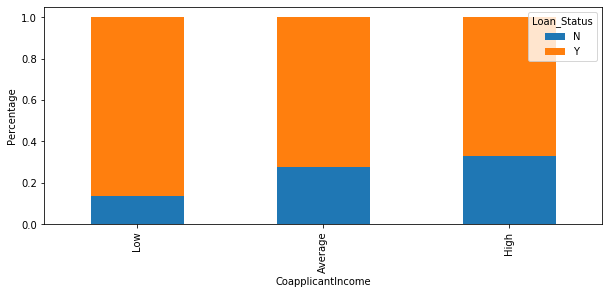

In [26]:
# CoapplicantIncome vs Loan_Status

bins=[0,1000,3000,42000]
groups=['Low','Average','High']
train['CoapplicantIncome_bin']=pd.cut(train['CoapplicantIncome'],bins,labels=groups)
Coapplicant_bin=pd.crosstab(train["CoapplicantIncome_bin"],train['Loan_Status'])
Coapplicant_bin.div(Coapplicant_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(10,4))
plt.xlabel('CoapplicantIncome')
#p=plt.ylabel('Percentage')
plt.ylabel('Percentage')
plt.show()

**INFERENCE :** 

**It shows that if coapplicant’s income is less the chances of loan approval are high. But this does not look right. The possible reason behind this may be that most of the applicants don’t have any coapplicant so the coapplicant income for such applicants is 0 and hence the loan approval is not dependent on it. So we can make a new variable in which we will combine the applicant’s and coapplicant’s income to visualize the combined effect of income on loan approval.**

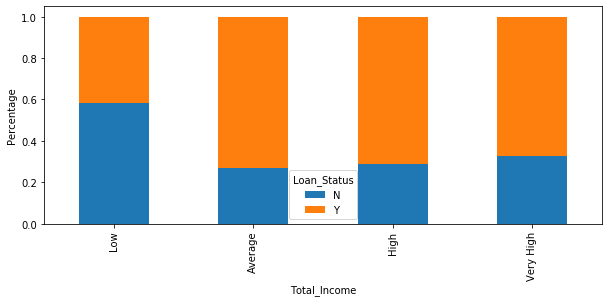

In [27]:
#Total_Income vs Loan_Status

train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
bins=[0,2500,4000,6000,81000]
groups=['Low','Average','High','Very High']
train['TotalIncome_bin']= pd.cut(train['Total_Income'],bins,labels=groups)
TotalIncome_bin= pd.crosstab(train['TotalIncome_bin'],train['Loan_Status'])
TotalIncome_bin.div(TotalIncome_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(10,4))
plt.xlabel('Total_Income')
plt.ylabel('Percentage')
plt.show()

**INFERENCE :**

**We can see that Proportion of loans getting approved for applicants having low Total_Income is very less as compared to that of applicants with Average, High and Very High Income.**

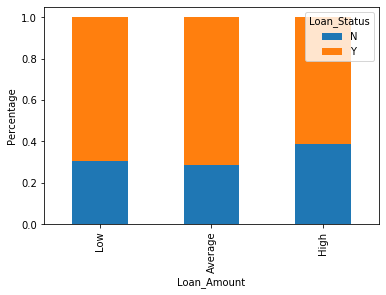

In [28]:
#LoanAmount vs Loan_Status

bins=[0,100,200,700]
group=['Low','Average','High']
train['LoanAmount_bin']=pd.cut(train['LoanAmount'],bins,labels=group)
LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'],train['Loan_Status'])
#LoanAmount_bin.apply(lambda x : x/x.sum(),axis=1)
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.xlabel('Loan_Amount')
plt.ylabel('Percentage')
plt.show()

**INFERENCE :**

**It can be seen that the proportion of approved loans is higher for Low and Average Loan Amount as compared to that of High Loan Amount which supports our hypothesis in which we considered that the chances of loan approval will be high when the loan amount is less.**

In [29]:
#Let’s drop the bins which we created for the exploration part.

train=train.drop(['Income_bin','CoapplicantIncome_bin','LoanAmount_bin','TotalIncome_bin','Total_Income'],axis=1)

In [30]:
# We will change the 3+ in dependents variable to 3 to make it a numerical variable.
# We will also convert the target variable’s categories into 0 and 1 
# so that we can find its correlation with numerical variables. 
# One more reason to do so is few models like logistic regression takes only numeric values as input. 
# We will replace N with 0 and Y with 1.

train['Dependents'].replace('3+',3, inplace=True)
test['Dependents'].replace('3+',3, inplace=True)
train['Loan_Status'].replace('N',0, inplace=True)
train['Loan_Status'].replace('Y',1, inplace=True)


In [31]:
# HEAT-MAP

# Now lets look at the correlation between all the numerical variables.
# We will use the heat map to visualize the correlation. 
# Heatmaps visualize data through variations in coloring. 
# The variables with darker color means their correlation is more.

matrix = train.corr() 
matrix

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715,-0.004710
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056,-0.059187
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433,-0.037318
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470,-0.021268
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000,0.561678
Loan_Status,-0.004710,-0.059187,-0.037318,-0.021268,0.561678,1.000000


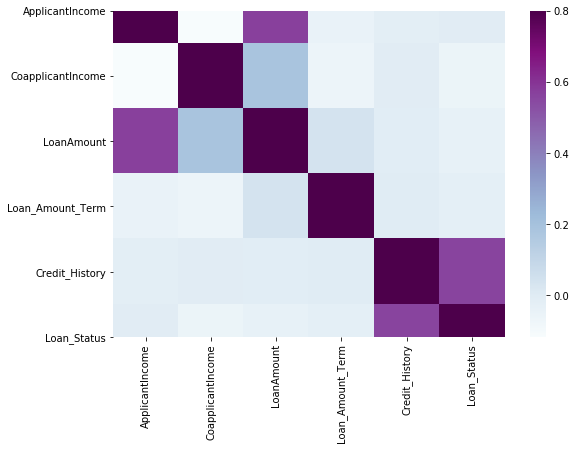

In [32]:
plt.subplots(figsize=(9, 6)) 
sns.heatmap(matrix, vmax=0.8, square=True, cmap="BuPu");

**INFERENCE :** 

**We see that the most correlated variables are (ApplicantIncome - LoanAmount) and (Credit_History - Loan_Status). LoanAmount is also correlated with CoapplicantIncome.**

#  6. Missing Value Treatment

In [33]:
# Let’s list out feature-wise count of missing values.

train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

 **Missing value treatment : categorical variables**

In [34]:
# There are very less missing values in Gender, Married, Dependents, Credit_History and Self_Employed features
# so we can fill them using the "mode" of the features.

train['Gender'].fillna(train['Gender'].mode()[0],inplace=True)
train['Married'].fillna(train['Married'].mode()[0],inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace=True)

# The mode() return 2 value, first is mode value second is count. 
# So train['Gender'].mode()[0] means get the mode value of train['Gender'].

train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

 **Missing value treatment : numerical variables**

In [35]:
# Imputation in Loan_Amount_Term

train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [36]:
# It can be seen that in loan amount term variable, the value of 360 is repeating the most. 
# So we will replace the missing values in this variable using the mode of this variable.

train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True)

train['Loan_Amount_Term'].value_counts()

360.0    526
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [37]:
# Imputation in LoanAmount

# We will use median to fill the null values as earlier we saw that loan amount have outliers
# so the "mean" will not be the proper approach as it is highly affected by the presence of outliers.

train['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)



In [38]:
#  Let’s re-count feature-wise number of missing values.

train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

**INFERENCE : As we can see that all the missing values have been filled in the train dataset.** 

In [39]:
# Let’s fill all the missing values in the test dataset too with the same approach.

test['Gender'].fillna(test['Gender'].mode()[0], inplace=True) 
test['Married'].fillna(test['Married'].mode()[0],inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0], inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0], inplace=True) 
test['LoanAmount'].fillna(test['LoanAmount'].median(), inplace=True)

test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

# 7. Outlier Treatment

**Due to these outliers bulk of the data in the loan amount is at the left and the right tail is longer. This is called right skewness. One way to remove the skewness is by doing the log transformation. As we take the log transformation, it does not affect the smaller values much, but reduces the larger values. So, we get a distribution similar to normal distribution.**

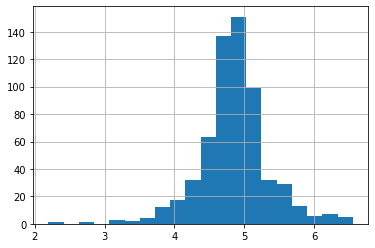

In [40]:
# Let’s visualize the effect of log transformation.
# We will do the similar changes to the test file simultaneously.

train['LoanAmount_log']=np.log(train['LoanAmount'])
test['LoanAmount_log']=np.log(test['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)
plt.show()

**INFERENCE : Now the distribution looks much closer to normal and effect of extreme values has been significantly subsided.**


# 8. Logistic Regression Without Feature Engineering

In [41]:
# Lets drop the Loan_ID variable as it do not have any effect on the loan status.
# We will do the same changes to the test dataset which we did for the training dataset.

train = train.drop('Loan_ID',axis=1)
test = test.drop('Loan_ID',axis=1)

**We will use scikit-learn (sklearn) for making different models which is an open source library for Python. It is one of the most efficient tool which contains many inbuilt functions that can be used for modeling in Python.**

In [42]:
# Sklearn requires the target variable in a separate dataset. 
# So, we will drop our target variable from the train dataset and save it in another dataset.

x= train.drop('Loan_Status',axis=1)
y= train.Loan_Status

In [43]:
# Dummy Variables

x=pd.get_dummies(x) 
train=pd.get_dummies(train)
test=pd.get_dummies(test)


In [44]:
# train_test_split function from sklearn

from sklearn.model_selection import train_test_split
x_train,x_cv,y_train,y_cv = train_test_split(x,y,test_size=0.3)

In [45]:
# Fit the logistic regression model.

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model=LogisticRegression()
model.fit(x_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [46]:
# Let’s predict the Loan_Status for validation set and calculate its accur

pred_cv=model.predict(x_cv)
pred_cv

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1], dtype=int64)

In [47]:
# Accuracy_Score

round(accuracy_score(y_cv,pred_cv),2)

0.81

**INFERENCE : So our predictions are almost 81% accurate, i.e. we have identified 81% of the loan status correctly.**

In [48]:
# Let’s make predictions for the test dataset.

pred_test=model.predict(test)

**Submission of Prediction**

In [49]:
submission=pd.read_csv("sample_submission.csv")
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']
submission['Loan_Status'].replace(0,'No',inplace=True)
submission['Loan_Status'].replace(1,'Yes',inplace=True)

In [50]:
submission['Loan_Status'].value_counts()

Yes    304
No      63
Name: Loan_Status, dtype: int64

In [51]:
#  Convert the submission to .csv format

pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('logistic.csv')


# 9. Logistic Regression using stratified k-folds cross validation



In [52]:
from sklearn.model_selection import StratifiedKFold
i=1 
skf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in skf.split(x,y):   
    #print("train:",train_index, "\ntest:",test_index)
    print('\n{} of kfold {}'.format(i,skf.n_splits))     
    xtr,xvl = x.loc[train_index],x.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = LogisticRegression(random_state=1)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)     
    i+=1 
    pred_test = model.predict(test)
    pred=model.predict_proba(xvl)[:,1]


1 of kfold 5
accuracy_score 0.8064516129032258

2 of kfold 5
accuracy_score 0.8064516129032258

3 of kfold 5
accuracy_score 0.8114754098360656

4 of kfold 5
accuracy_score 0.7950819672131147

5 of kfold 5
accuracy_score 0.8360655737704918


**The mean validation accuracy for this model turns out to be 0.81.**

 **Let us visualize the ROC curve.**

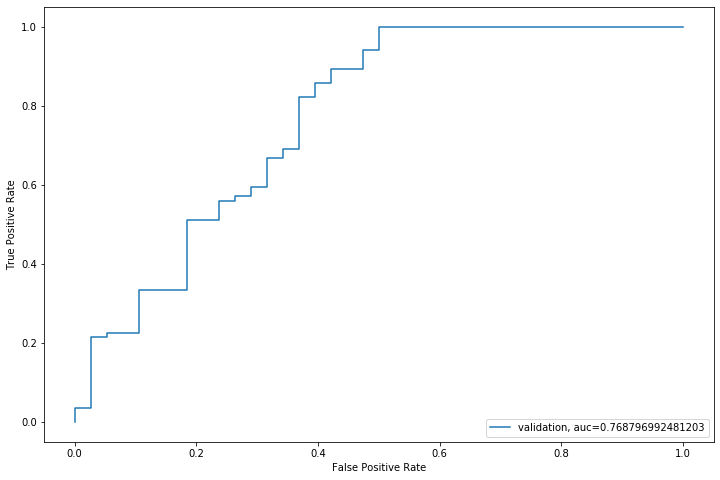

In [53]:
from sklearn import metrics 
fpr, tpr,_ = metrics.roc_curve(yvl,pred)
auc = metrics.roc_auc_score(yvl, pred) 
plt.figure(figsize=(12,8)) 
plt.plot(fpr,tpr,label="validation, auc="+str(auc))
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.legend(loc=4) 
plt.show()


**We got an auc value of 0.77.**

In [54]:
submission['Loan_Status']=pred_test 
submission['Loan_ID']=test_original['Loan_ID']
submission['Loan_Status'].replace(0, 'N',inplace=True) 
submission['Loan_Status'].replace(1, 'Y',inplace=True)
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('Logistic.csv')

# 10. Feature Engineering

**Based on the domain knowledge, we can come up with new features that might affect the target variable. We will create the following three new features:Total_Income , EMI , Balance_Income**

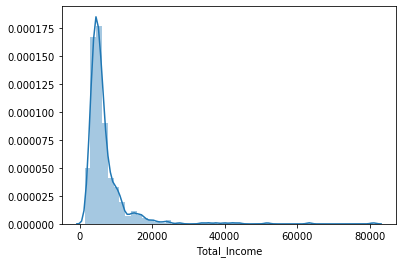

In [55]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome'] 
test['Total_Income']=test['ApplicantIncome']+test['CoapplicantIncome']
sns.distplot(train['Total_Income']);


**We can see it is shifted towards left, i.e., the distribution is right skewed. So, let’s take the log transformation to make the distribution normal.**

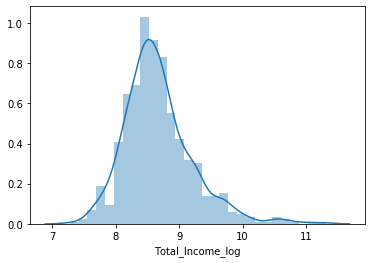

In [56]:
# Creating Variable Total_Income

train['Total_Income_log'] = np.log(train['Total_Income']) 
sns.distplot(train['Total_Income_log']); 
test['Total_Income_log'] = np.log(test['Total_Income'])

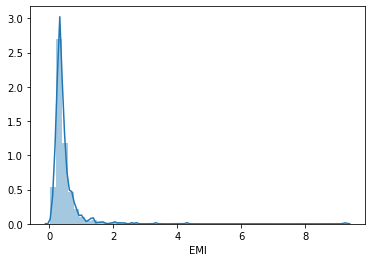

In [57]:
# Creating Variable EMI

train['EMI']=train['LoanAmount']/train['Loan_Amount_Term'] 
test['EMI']=test['LoanAmount']/test['Loan_Amount_Term']
sns.distplot(train['EMI']);

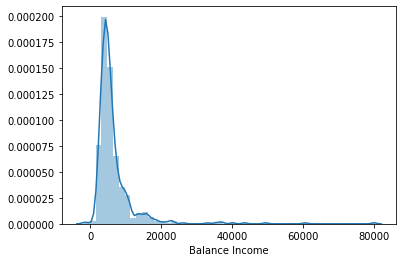

In [58]:
# # Creating Variable Balance_Income
train['Balance Income']=train['Total_Income']-(train['EMI']*1000) 
# Multiply with 1000 to make the units equal 

test['Balance Income']=test['Total_Income']-(test['EMI']*1000)
sns.distplot(train['Balance Income']);

In [59]:
#Let us now drop the variables which we used to create these new features. Reason for doing this is, the correlation 
#between those old features and these new features will be very high and logistic regression assumes that the variables
#are not highly correlated. We also wants to remove the noise from the dataset, so removing correlated features will help
#in reducing the noise too.

train=train.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1) 
test=test.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)

#      *******************Model Building : Part II****************************  


In [60]:
# Let’s prepare the data for feeding into the models.
x=train.drop('Loan_Status',1)
y=train["Loan_Status"]

# 11. Logistic regression :

# This is different from previous code because here we have added 3 new vars and removed some vars to avoid collinearity.

In [61]:
i=1
skf=StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in skf.split(x,y):
    print('\n {} of k fold {}'.format(i,skf.n_splits))
    xtr , xvl = x.loc[train_index],x.loc[test_index]
    ytr , yvl = y.loc[train_index],y.loc[test_index]
    model=LogisticRegression(random_state=1)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    print('Accuracy Score',score)
    i+=1
    pred_test=model.predict(test)
    pred=model.predict_proba(xvl)[:,1]


 1 of k fold 5
Accuracy Score 0.8064516129032258

 2 of k fold 5
Accuracy Score 0.8064516129032258

 3 of k fold 5
Accuracy Score 0.8032786885245902

 4 of k fold 5
Accuracy Score 0.7950819672131147

 5 of k fold 5
Accuracy Score 0.8360655737704918


**The mean validation accuracy for this model is 0.81.**

In [62]:
# Submission of file
submission['Loan_Status']=pred_test
submission["Loan_ID"]=test_original['Loan_ID']
submission['Loan_Status'].replace(0,'N',inplace=True)
submission['Loan_Status'].replace(1,'Y',inplace=True)
pd.DataFrame(submission).to_csv('Logistic-Regression.csv')

# 12. Decision Tree

**Decision trees use multiple algorithms to decide to split a node in two or more sub-nodes. The creation of sub-nodes increases the homogeneity of resultant sub-nodes. In other words, we can say that purity of the node increases with respect to the target variable.**

In [63]:
# Let’s fit the decision tree model with 5 folds of cross validation.
from sklearn import tree
i=1
skf=StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index, test_index in skf.split(x,y):
    print('\n{} of K fold {}'.format(i,skf.n_splits))
    xtr, xvl= x.loc[train_index],x.loc[test_index]
    ytr, yvl =y.loc[train_index], y.loc[test_index]
    model=tree.DecisionTreeClassifier(random_state=1)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    print('Accuracy Score',score)
    i+=1
    pred_test=model.predict(test)
   


1 of K fold 5
Accuracy Score 0.75

2 of K fold 5
Accuracy Score 0.75

3 of K fold 5
Accuracy Score 0.6721311475409836

4 of K fold 5
Accuracy Score 0.6967213114754098

5 of K fold 5
Accuracy Score 0.7049180327868853


**The mean validation accuracy for this model is 0.71**

In [64]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']
submission['Loan_Status'].replace(0,'N',inplace=True)
submission['Loan_Status'].replace(1,'Y',inplace=True)
pd.DataFrame(submission).to_csv('Decision-tree.csv')

# 13. Random Forest

**RandomForest is a tree based bootstrapping algorithm wherein a certain no. of weak learners (decision trees) are combined to make a powerful prediction model.
For every individual learner, a random sample of rows and a few randomly chosen variables are used to build a decision tree model.
Final prediction can be a function of all the predictions made by the individual learners.
In case of regression problem, the final prediction can be mean of all the predictions.**

In [65]:
from sklearn.ensemble import RandomForestClassifier
i=1
skf=StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index, test_index in skf.split(x,y):
    print('\n{} of K fold {}'.format(i,skf.n_splits))
    xtr, xvl= x.loc[train_index],x.loc[test_index]
    ytr, yvl =y.loc[train_index], y.loc[test_index]
    model=RandomForestClassifier(random_state=1,max_depth=10)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    print('Accuracy Score',score)
    i+=1
    pred_test=model.predict(test)
    


1 of K fold 5
Accuracy Score 0.7338709677419355

2 of K fold 5
Accuracy Score 0.7903225806451613

3 of K fold 5
Accuracy Score 0.7868852459016393

4 of K fold 5
Accuracy Score 0.7704918032786885

5 of K fold 5
Accuracy Score 0.8524590163934426


**The mean validation accuracy for this model is 0.79**

**We will try to improve the accuracy by tuning the hyperparameters for this model. We will use GRID SEARCH to get the optimized values of hyper parameters. Grid-search is a way to select the best of a family of hyper parameters, parametrized by a grid of parameters**

**We will tune the max_depth and n_estimators parameters. max_depth decides the maximum depth of the tree and n_estimators decides the number of trees that will be used in random forest model**

In [66]:
from sklearn.model_selection import GridSearchCV

# Provide range for max_depth from 1 to 20 with an interval of 2 and from 1 to 200 with an interval of 20 for n_estimators 
paramgrid = {'max_depth': list(range(1, 20, 2)), 'n_estimators': list(range(1, 200, 20))}
grid_search=GridSearchCV(RandomForestClassifier(random_state=1),paramgrid)

from sklearn.model_selection import train_test_split 
x_train, x_cv, y_train, y_cv = train_test_split(x,y, test_size =0.3, random_state=1)

# Fit the grid search model 
grid_search.fit(x_train,y_train)

C:\Users\deepa\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=1,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_gri

In [67]:
# Estimating the optimized value 
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=141,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

**HYPERPARAMETER TUNING**

**So, the optimized value for the max_depth variable is 3 and for n_estimator is 141. Now let’s build the model using these optimized values.**

In [68]:
i=1 
skf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in skf.split(x,y):     
    print('\n{} of kfold {}'.format(i,skf.n_splits))     
    xtr,xvl = x.loc[train_index],x.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = RandomForestClassifier(random_state=1, max_depth=3, n_estimators=141)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)
    print('accuracy_score',score)     
    i+=1 
    pred_test = model.predict(test) 
    pred2=model.predict_proba(test)[:,1]


1 of kfold 5
accuracy_score 0.8145161290322581

2 of kfold 5
accuracy_score 0.7983870967741935

3 of kfold 5
accuracy_score 0.7950819672131147

4 of kfold 5
accuracy_score 0.7950819672131147

5 of kfold 5
accuracy_score 0.8442622950819673


**The mean validation accuracy for this model is 0.81**

In [69]:
# Saving the prediction data

submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']
submission['Loan_Status'].replace(0,'N',inplace=True)
submission['Loan_Status'].replace(1,'Y',inplace=True)
pd.DataFrame(submission).to_csv('Random-Forest.csv')

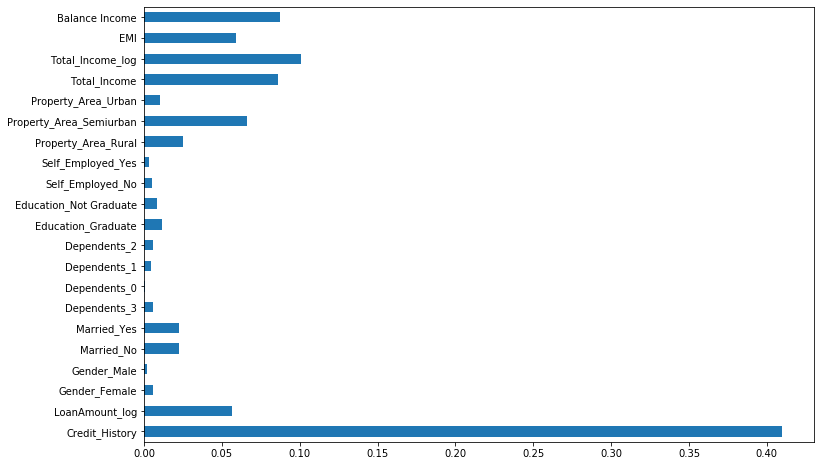

In [70]:
# Let us find the feature importance now, i.e. which features are most important for this problem. We will use 
#feature_importances_ attribute of sklearn to do so.

importances=pd.Series(model.feature_importances_, index=x.columns) 
importances.plot(kind='barh', figsize=(12,8))
plt.show()

**We can see that Credit_History is the most important feature followed by Balance Income, Total Income, EMI. So, feature engineering helped us in predicting our target variable.**

# 14. XGBOOST

XGBoost works only with numerical variables and we have already replaced categorical variables with numerical variables.
Let's have a look at the parameters that we are going to use in our model:
            **n_estimator** : This specifies the number of trees for the model.
            **max_depth**   : We can specify the maximum depth of a tree using this parameter.

In [71]:
from xgboost import XGBClassifier
i=1
skf=StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in skf.split(x,y):
    print('\n{} of k fold {}'.format(i,skf.n_splits))
    xtr,xvl=x.loc[train_index],x.loc[test_index]
    ytr,yvl=y.loc[train_index],y.loc[test_index]
    model=XGBClassifier(n_estimator=50,max_depth=4)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    print('Accuracy Score',score)
    i+=1
    pred_test=model.predict(test)
    pred=model.predict_proba(xvl)[:,1]


1 of k fold 5
Accuracy Score 0.7903225806451613

2 of k fold 5
Accuracy Score 0.7580645161290323

3 of k fold 5
Accuracy Score 0.7622950819672131

4 of k fold 5
Accuracy Score 0.7622950819672131

5 of k fold 5
Accuracy Score 0.7950819672131147


**The mean validation accuracy for this model is 0.77**

In [72]:
# Saving the prediction data

submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']
submission['Loan_Status'].replace(0,'N',inplace=True)
submission['Loan_Status'].replace(1,'Y',inplace=True)
pd.DataFrame(submission).to_csv('XGBoost.csv')

# 15. AdaBoost Classifier

In [73]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
i=1
skf=StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in skf.split(x,y):
    print('\n{} of k fold {}'.format(i,skf.n_splits))
    xtr,xvl=x.loc[train_index],x.loc[test_index]
    ytr,yvl=y.loc[train_index],y.loc[test_index]
    dt=DecisionTreeClassifier()
    clf=AdaBoostClassifier(n_estimators=100,base_estimator=dt,learning_rate=1)
    clf.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    print('Accuracy Score',score)
    i+=1
    pred_test=model.predict(test)
    


1 of k fold 5
Accuracy Score 1.0

2 of k fold 5
Accuracy Score 0.9919354838709677

3 of k fold 5
Accuracy Score 1.0

4 of k fold 5
Accuracy Score 0.9836065573770492

5 of k fold 5
Accuracy Score 0.7950819672131147


**The mean validation accuracy for this model is 0.954**

In [74]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']
submission['Loan_Status'].replace(0,'N',inplace=True)
submission['Loan_Status'].replace(1,'Y',inplace=True)
pd.DataFrame(submission).to_csv('AdaBoost-Decision-tree.csv')

# 16. Summary


**We tried 5 different algorithms and the accuracy score achieved by each are as follow :** 

              1. Logistic Regression - 81%
              2. Decision Tree - 71%
              3. Random Forest - 81%
              4. XGBoost - 77%
              5. AdaBoost - 95.4%